# SEM (моделирование структурными уравнениями)

In [1]:
# https://pypi.org/project/semopy/

In [2]:
# https://gitlab.com/georgy.m/semopy/-/blob/master/notebooks/semopy%20-%20Walkthrough.ipynb

In [3]:
# pip install semopy

# Пример 1. Анализ демократии

In [4]:
# https://semopy.com/tutorial.html

In [2]:
#First, let's get text description of the SEM model
import semopy
import pandas as pd
desc = semopy.examples.political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [3]:
#Let's get the associated dataset
data = semopy.examples.political_democracy.get_data()
print(data.head())

      y1        y2        y3        y4        y5        y6        y7  \
1   2.50  0.000000  3.333333  0.000000  1.250000  0.000000  3.726360   
2   1.25  0.000000  3.333333  0.000000  6.250000  1.100000  6.666666   
3   7.50  8.800000  9.999998  9.199991  8.750000  8.094061  9.999998   
4   8.90  8.800000  9.999998  9.199991  8.907948  8.127979  9.999998   
5  10.00  3.333333  9.999998  6.666666  7.500000  3.333333  9.999998   

         y8        x1        x2        x3  
1  3.333333  4.442651  3.637586  2.557615  
2  0.736999  5.384495  5.062595  3.568079  
3  8.211809  5.961005  6.255750  5.224433  
4  4.615086  6.285998  7.567863  6.267495  
5  6.666666  5.863631  6.818924  4.573679  


In [4]:
#Now, we fit the model to the data and examine optimization results
mod = semopy.Model(desc)
res = mod.fit(data)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 2.352 3.256 3.951 0.172 0.467 0.120 0.082 3.430 0.448


In [5]:
#Finally, let's inspect parameters estimates
ins = mod.inspect()
print(ins)

     lval  op   rval  Estimate  Std. Err    z-value   p-value
0   dem60   ~  ind60  1.482379  0.399024   3.715017  0.000203
1   dem65   ~  ind60  0.571912  0.221383   2.583364  0.009784
2   dem65   ~  dem60  0.837574  0.098446   8.507992       0.0
3      x1   ~  ind60  1.000000         -          -         -
4      x2   ~  ind60  2.180494  0.138565  15.736254       0.0
5      x3   ~  ind60  1.818546  0.151993   11.96465       0.0
6      y1   ~  dem60  1.000000         -          -         -
7      y2   ~  dem60  1.256819  0.182687   6.879647       0.0
8      y3   ~  dem60  1.058174  0.151521   6.983699       0.0
9      y4   ~  dem60  1.265186  0.145151   8.716344       0.0
10     y5   ~  dem65  1.000000         -          -         -
11     y6   ~  dem65  1.185743  0.168908   7.020032       0.0
12     y7   ~  dem65  1.279717  0.159996    7.99841       0.0
13     y8   ~  dem65  1.266084  0.158238   8.001141       0.0
14  dem60  ~~  dem60  3.950849  0.920451   4.292296  0.000018
15  dem6

In [51]:
#You can calculate indices by calling the calc_stats function
import semopy

data = semopy.examples.political_democracy.get_data()
mod = semopy.examples.political_democracy.get_model()
m = semopy.Model(mod)
res = m.fit(data)
stats = semopy.calc_stats(m)
print(stats.T)

                    Value
DoF             35.000000
DoF Baseline    55.000000
chi2            38.125446
chi2 p-value     0.329171
chi2 Baseline  730.654577
CFI              0.995374
GFI              0.947820
AGFI             0.918003
NFI              0.947820
TLI              0.992731
RMSEA            0.034738
AIC             60.983321
BIC            132.825453
LogLik           0.508339


In [53]:
#Semopy provides a report function that takes a fitted model and generates an HTML file
from semopy.examples import political_democracy
from semopy import ModelMeans

desc = political_democracy.get_model()
data = political_democracy.get_data()
model = ModelMeans(desc)
model.fit(data)
semopy.report(model, "Political Democracy")

# Пример 2. Модель Наследова КФА1 (CFA1)

In [1]:
import os
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

## Эксплораторный факторный анализ

In [2]:
import pandas as pd
data = pd.read_spss('IQ.sav')

### 1. Проверка данных на нормальность - смотри пример 4.

### 2. Вычисление корреляционной матрицы, критерия КМО (д.б. >0.4) и критерия сферичности Бартлетта (д.б. значим).

КМО - мера адекватности выборки Кайзера-Майера-Олкина.

In [3]:
correlations = data.corr(method='pearson')
print(correlations)

           и1        и2        и3        и4        и5        и6        и7  \
и1   1.000000  0.278136  0.382815  0.056543  0.126228  0.288101  0.227740   
и2   0.278136  1.000000  0.317020  0.265253  0.434426  0.386914  0.288940   
и3   0.382815  0.317020  1.000000  0.236654  0.247927  0.338364  0.303717   
и4   0.056543  0.265253  0.236654  1.000000  0.387524  0.113632  0.568078   
и5   0.126228  0.434426  0.247927  0.387524  1.000000  0.328341  0.225023   
и6   0.288101  0.386914  0.338364  0.113632  0.328341  1.000000  0.173320   
и7   0.227740  0.288940  0.303717  0.568078  0.225023  0.173320  1.000000   
и8   0.190804  0.318136  0.345558  0.631521  0.186739  0.239513  0.467591   
и9   0.018499  0.290475  0.309067  0.418084  0.244287  0.182486  0.584902   
и10  0.024130  0.529594  0.183897  0.515799  0.436619  0.192450  0.267243   
и11  0.440035  0.176305  0.440594 -0.018582  0.249810  0.328322  0.076681   

           и8        и9       и10       и11  
и1   0.190804  0.018499  0.02

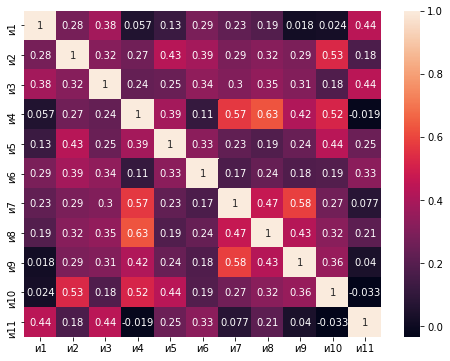

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [5]:
#!pip install factor_analyzer

In [6]:
#https://github.com/Sarmentor/KMO-Bartlett-Tests-Python/blob/master/correlation.py

In [7]:
#https://www.analyticsvidhya.com/blog/2020/10/dimensionality-reduction-using-factor-analysis-in-python/

In [5]:
#KMO Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(data)
print(kmo_model)

0.7339669795474386


KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. KMO score is always between 0 to 1 and values more than 0.6 are much appreciated. We can also say it as a measure of how suited our data is for factor analysis.

По результатам анализа, КМО > 0.6. Следовательно, данные подходят для факторного анализа.

In [6]:
#Bartlett Sphericity Test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2, p = calculate_bartlett_sphericity(data)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  700.1476412435483
p value :  5.818102381135092e-113


Bartlett’s test checks whether the correlation is present in the given data.
* H0: the matrix of population correlations is equal to the identity matrix
* H1: the matrix of population correlations is different from the identity matrix.

Exploratory factor analysis is only useful if the matrix of population correlation is statistically different from the identity matrix. 

По результатам проведения теста Бартлетта, p value < 0.05. Следовательно, H0 отклоняется, т.е. корреляция между признаками есть и можно проводить факторный анализ.

### 3. Анализ главных компонент и оценка числа факторов по графику собственных значений

In [32]:
# https://www.analyticsvidhya.com/blog/2020/10/dimensionality-reduction-using-factor-analysis-in-python/

The number of factors in our dataset is equal to the number of variables in our dataset. The number of factors can be decided on the basis of the amount of common variance the factors explain. In general, we will plot the factors and their eigenvalues. Eigenvalues are nothing but the amount of variance the factor explains. We will select the number of factors whose eigenvalues are greater than 1. But why should we choose the factors whose eigenvalues are greater than 1? The answer is very simple. In a standard normal distribution with mean 0 and Standard deviation 1, the variance will be 1.

In [7]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaler = StandardScaler().fit(data)
rescaled_data = scaler.transform(data)
# summarize transformed data
set_printoptions(precision=3)
print(rescaled_data[0:5,:])

[[ 0.698 -0.279  0.456 -1.487 -1.039  0.51   0.711 -0.698  0.012 -0.412
   0.711]
 [-0.229  0.782  0.855 -0.037 -0.04   0.929 -0.607  0.983 -1.32  -0.035
   0.711]
 [ 0.234 -0.632 -0.343 -0.037  0.46   0.929 -0.607  0.563 -0.987 -0.035
  -0.584]
 [ 1.625  0.782  1.654  0.929  1.459 -0.328 -0.607 -0.278  0.012 -0.035
   1.143]
 [ 0.698  0.782 -0.343 -0.52  -0.54   0.929 -1.924  0.142 -2.986 -0.035
  -0.152]]


Since we have standard scaled the data the variance of a feature is 1. This is the reason for selecting factors whose eigenvalues(variance) are greater than 1 i.e. the factors which explain more variance than a single observed variable.

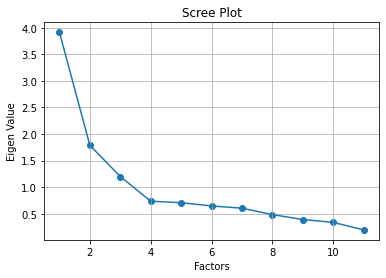

In [8]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=rescaled_data.shape[1])
fa.fit(rescaled_data)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,rescaled_data.shape[1]+1),ev)
plt.plot(range(1,rescaled_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

Из рисунка видим, что собственное значение падает ниже 1 начиная с 4-го фактора. Поэтому оптимальное число факторов - 3.

Проверим сказанное на основе метода главных компонент.

In [9]:
from sklearn.decomposition import PCA

In [10]:
#С помощью метода главных компонент выделим 3 главные компоненты
pca = PCA(n_components=3)
pca.fit(rescaled_data)

PCA(n_components=3)

In [11]:
#Собственные значения
pca.singular_values_

array([26.842, 18.14 , 14.856])

In [12]:
#Объясненная дисперсия
pca.explained_variance_ratio_

array([0.356, 0.163, 0.109])

In [13]:
#Координаты компонент 
print (pca.components_)

[[-0.2   -0.335 -0.305 -0.352 -0.299 -0.258 -0.342 -0.352 -0.32  -0.313
  -0.185]
 [-0.462 -0.067 -0.301  0.349 -0.027 -0.313  0.196  0.121  0.252  0.26
  -0.535]
 [-0.181  0.404 -0.197 -0.113  0.469  0.219 -0.376 -0.311 -0.223  0.429
  -0.114]]


### 4. Факторный анализ и интерпретация факторов

In [8]:
# https://www.analyticsvidhya.com/blog/2020/10/dimensionality-reduction-using-factor-analysis-in-python/

Create an optimal number of factors i.e. 3 in our case. Then, we have to interpret the factors by making use of loadings, variance, and commonalities.

In [14]:
# LOADINGS
# Аналог повернутой факторной матрицы в SPSS
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(rescaled_data)
print(pd.DataFrame(fa.loadings_,index=data.columns))

            0         1         2
и1   0.080661  0.603255  0.052619
и2   0.193695  0.294815  0.631743
и3   0.297040  0.577088  0.159373
и4   0.744854 -0.049060  0.328450
и5   0.178165  0.217800  0.555363
и6   0.085643  0.461925  0.328006
и7   0.743603  0.163292  0.098763
и8   0.649734  0.231956  0.171715
и9   0.609550  0.072860  0.211753
и10  0.327284 -0.090637  0.747687
и11 -0.008053  0.725004  0.043057


Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.

В нашем случае: 
* Фактор 0 имеет наибольшее влияние на следующие переменные: и7, и8, и9.
* Фактор 1 имеет наибольшее влияние на следующие переменные: и1, и3, и11, и6.
* Фактор 2 имеет наибольшее влияние на следующие переменные: и2, и5, и10.

In [9]:
# https://towardsdatascience.com/how-to-analyze-survey-data-with-python-84eff9cc9568

In [10]:
#!pip install pyreadstat

In [18]:
import numpy as np
import pandas as pd
import pyreadstat
df, meta = pyreadstat.read_sav('IQ.sav')
df.head(5)

,и1,и2,и3,и4,и5,и6,и7,и8,и9,и10,и11
0,12.0,9.0,11.0,8.0,8.0,11.0,13.0,8.0,12.0,10.0,11.0
1,10.0,12.0,12.0,11.0,10.0,12.0,9.0,12.0,8.0,11.0,11.0
2,11.0,8.0,9.0,11.0,11.0,12.0,9.0,11.0,9.0,11.0,8.0
3,14.0,12.0,14.0,13.0,13.0,9.0,9.0,9.0,12.0,11.0,12.0
4,12.0,12.0,9.0,10.0,9.0,12.0,5.0,10.0,3.0,11.0,9.0


In [19]:
meta.column_labels

['осведомленность',
 'скрытые фигуры',
 'пропущенные слова',
 'счет в уме',
 'понятливость',
 'исключение изображений',
 'аналогии',
 'числовые ряды',
 'умозаключения',
 'геометрическое сложение',
 'заучивание слов']

In [21]:
meta_dict = dict(zip(meta.column_names, meta.column_labels))
meta_dict

{'и1': 'осведомленность',
 'и2': 'скрытые фигуры',
 'и3': 'пропущенные слова',
 'и4': 'счет в уме',
 'и5': 'понятливость',
 'и6': 'исключение изображений',
 'и7': 'аналогии',
 'и8': 'числовые ряды',
 'и9': 'умозаключения',
 'и10': 'геометрическое сложение',
 'и11': 'заучивание слов'}

In [22]:
meta_dict['и1']

'осведомленность'

In [25]:
# Проинтерпретируем факторы:
meta_dict.keys()

dict_keys(['и1', 'и2', 'и3', 'и4', 'и5', 'и6', 'и7', 'и8', 'и9', 'и10', 'и11'])

In [26]:
# Проинтерпретируем факторы:
meta_dict.values()

dict_values(['осведомленность', 'скрытые фигуры', 'пропущенные слова', 'счет в уме', 'понятливость', 'исключение изображений', 'аналогии', 'числовые ряды', 'умозаключения', 'геометрическое сложение', 'заучивание слов'])

In [30]:
F0=[meta_dict[key] for key in ('и7', 'и8', 'и9')]
F0

['аналогии', 'числовые ряды', 'умозаключения']

In [31]:
F1=[meta_dict[key] for key in ('и1', 'и3', 'и11', 'и6')]
F1

['осведомленность',
 'пропущенные слова',
 'заучивание слов',
 'исключение изображений']

In [32]:
F3=[meta_dict[key] for key in ('и2', 'и5', 'и10')]
F3

['скрытые фигуры', 'понятливость', 'геометрическое сложение']

Таким образом: 
* Фактор 0 можно назвать математические способности.
* Фактор 1 можно назвать вербальные способности.
* Фактор 2 можно назвать невербальные (образные) способности.

In [34]:
# VARIANCE
# Аналог таблицы "Объясненная совокупная дисперсия" столбца "Ротация суммы квадратов нагрузок" в SPSS
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2
Variance          2.179972  1.666704  1.596133
Proportional Var  0.198179  0.151519  0.145103
Cumulative Var    0.198179  0.349698  0.494801


Из таблицы видим результаты после вращения, а именно дисперсию переменных, объясняемую факторами (Variance), долю объясненной дисперсии (Proportional Var) и накопленную долю объясненной факторами дисперсии (Cumulative Var). Таким образом, 3 фактора совместно способны объяснить 49,5% общей дисперсии.

In [37]:
# COMMUNALITIES
# Аналог общности в SPSS
print(pd.DataFrame(fa.get_communalities(),index=data.columns,columns=['Communalities']))

     Communalities
и1        0.373192
и2        0.523533
и3        0.446663
и4        0.665095
и5        0.387608
и6        0.328298
и7        0.589364
и8        0.505443
и9        0.421698
и10       0.674365
и11       0.527550


В таблице мы видим для каждой переменной долю дисперсии, объясненной факторами. Например, для переменной и1 37% ее дисперсии объясняется всеми факторами вместе.

## Конфирматорный факторный анализ (на основе результатов эксплораторного ФА)

In [38]:
desc='''
F0 =~ и7 + и8 + и9
F1 =~ и1 + и3 + и11 + и6
F2 =~ и2 + и5 + и10
F0 ~~ F1
F1 ~~ F2
F0 ~~ F2
'''

In [39]:
from semopy import Model
mod = Model(desc)

In [11]:
#pip install pyreadstat

In [40]:
import pandas as pd
data = pd.read_spss('IQ.sav')

In [41]:
res=mod.fit(data)
res

SolverResult(fun=0.46208285737389687, success=True, n_it=45, x=array([0.64 , 0.946, 1.42 , 1.142, 1.026, 0.551, 0.828, 1.294, 2.836,
       5.402, 1.342, 1.547, 2.565, 3.79 , 3.103, 4.062, 3.812, 3.259,
       3.147, 3.345, 3.451, 4.174, 4.746]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [42]:
print(mod.inspect('mx', what='names')['Lambda'])

      F0   F1    F2
и1   0.0  _b4   0.0
и10  0.0  0.0  _b10
и11  0.0  _b6   0.0
и2   0.0  0.0   _b8
и3   0.0  _b5   0.0
и5   0.0  0.0   _b9
и6   0.0  _b7   0.0
и7   _b1  0.0   0.0
и8   _b2  0.0   0.0
и9   _b3  0.0   0.0


In [43]:
print(mod.inspect())

   lval  op rval  Estimate  Std. Err   z-value   p-value
0    и7   ~   F0  1.000000         -         -         -
1    и8   ~   F0  0.639692  0.090359  7.079473       0.0
2    и9   ~   F0  0.946050  0.122537  7.720523       0.0
3    и1   ~   F1  1.000000         -         -         -
4    и3   ~   F1  1.419752   0.23909   5.93814       0.0
5   и11   ~   F1  1.142256  0.203004  5.626768       0.0
6    и6   ~   F1  1.026008  0.198077   5.17983       0.0
7    и2   ~   F2  1.000000         -         -         -
8    и5   ~   F2  0.551143  0.083474  6.602569       0.0
9   и10   ~   F2  0.828472  0.116417  7.116442       0.0
10   F0  ~~   F1  1.293808  0.350594   3.69033  0.000224
11   F0  ~~   F2  2.835856  0.594187  4.772669  0.000002
12   F0  ~~   F0  5.402200  1.043111  5.178932       0.0
13   F1  ~~   F2  1.341844  0.342109  3.922267  0.000088
14   F1  ~~   F1  1.546702  0.427931  3.614372  0.000301
15   F2  ~~   F2  4.746409  0.933442  5.084846       0.0
16   и5  ~~   и5  2.564926  0.3

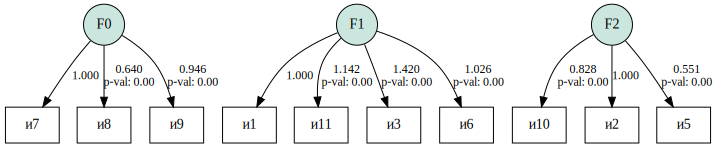

In [45]:
import semopy
g = semopy.semplot(mod, "pd.png")
g

In [46]:
stats = semopy.calc_stats(mod)
print(stats.T)

                    Value
DoF             32.000000
DoF Baseline    45.000000
chi2            85.023246
chi2 p-value     0.000001
chi2 Baseline  517.508283
CFI              0.887783
GFI              0.835707
AGFI             0.768962
NFI              0.835707
TLI              0.842195
RMSEA            0.095155
AIC             45.075834
BIC            119.019357
LogLik           0.462083


Вывод: модель плохо согласуется с исходными данными.

## Конфирматорный факторный анализ (Наследов)

In [75]:
desc='''
F1 =~ и4 + и7 + и8 + и9
F2 =~ и11 + и1 + и3
F3 =~ и5 + и2 + и10 + и6
F1 ~~ F2
F2 ~~ F3
F1 ~~ F3
'''

In [76]:
from semopy import Model
mod = Model(desc)

In [12]:
#pip install pyreadstat

In [3]:
import pandas as pd
data = pd.read_spss('IQ.sav')

In [78]:
res=mod.fit(data)
res

SolverResult(fun=0.9413567641467715, success=True, n_it=42, x=array([1.36090608, 1.0670817 , 1.17064411, 0.87429727, 1.26070267,
       1.69940042, 1.42329446, 0.90573023, 0.89979671, 1.22629875,
       2.63954552, 0.87563619, 2.07228517, 1.64196534, 4.42028994,
       2.45379189, 4.32643608, 3.906229  , 3.06838269, 2.97391649,
       5.38935216, 3.52804078, 3.29248239, 2.65513122, 1.55064085]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [17]:
print(mod.inspect('mx', what='names')['Lambda'])

      F1   F2    F3
и1   0.0  _b6   0.0
и10  0.0  0.0  _b10
и11  0.0  _b5   0.0
и2   0.0  0.0   _b9
и3   0.0  _b7   0.0
и4   _b1  0.0   0.0
и5   0.0  0.0   _b8
и6   0.0  0.0  _b11
и7   _b2  0.0   0.0
и8   _b3  0.0   0.0
и9   _b4  0.0   0.0


In [79]:
print(mod.inspect())

   lval  op rval  Estimate  Std. Err   z-value   p-value
0    и4   ~   F1  1.000000         -         -         -
1    и7   ~   F1  1.360906   0.14804  9.192854       0.0
2    и8   ~   F1  1.067082  0.116034  9.196269       0.0
3    и9   ~   F1  1.170644  0.145717  8.033704       0.0
4   и11   ~   F2  1.000000         -         -         -
5    и1   ~   F2  0.874297  0.159144  5.493755       0.0
6    и3   ~   F2  1.260703  0.220631  5.714079       0.0
7    и5   ~   F3  1.000000         -         -         -
8    и2   ~   F3  1.699400  0.241879  7.025833       0.0
9   и10   ~   F3  1.423294  0.213519   6.66588       0.0
10   и6   ~   F3  0.905730  0.175359  5.165003       0.0
11   F1  ~~   F2  0.899797  0.263946  3.409024  0.000652
12   F1  ~~   F3  1.226299  0.253681  4.834019  0.000001
13   F1  ~~   F1  2.639546  0.455621  5.793297       0.0
14   F2  ~~   F3  0.875636  0.235061  3.725148  0.000195
15   F2  ~~   F2  2.072285  0.550223  3.766263  0.000166
16   F3  ~~   F3  1.550641  0.3

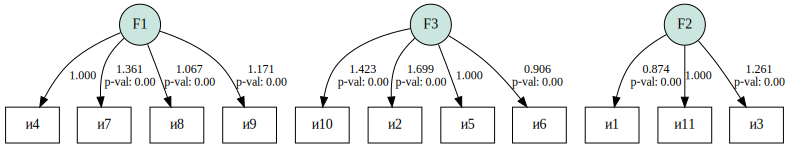

In [80]:
g = semopy.semplot(mod, "pd.png")
g

In [81]:
stats = semopy.calc_stats(mod)
print(stats.T)

                    Value
DoF             41.000000
DoF Baseline    55.000000
chi2           173.209645
chi2 p-value     0.000000
chi2 Baseline  710.691801
CFI              0.798366
GFI              0.756280
AGFI             0.673059
NFI              0.756280
TLI              0.729516
RMSEA            0.132744
AIC             48.117286
BIC            128.490680
LogLik           0.941357


Вывод: модель плохо согласуется с исходными данными.

In [82]:
#Semopy provides a report function that takes a fitted model and generates an HTML file
from semopy import ModelMeans

model = ModelMeans(desc)
model.fit(data)
semopy.report(model, "CFA1")

# Пример 3. Модель на основе Exploratory Factor Analysis в semopy

In [4]:
#Exploratory Factor Analysis
import semopy
import numpy as np
import pandas as pd

data = pd.read_spss('IQ.sav')

desc=print(semopy.efa.explore_cfa_model(data))
desc

eta1 =~ и4 + и8 + и7 + и9 + и10 + и2 + и5
eta2 =~ и2 + и3 + и6 + и5 + и11 + и1



In [13]:
#Pine model is a generalization of CFA model. 
#In Pine setting, we allow latent factors in CFA model to be indicators of some other "higher level" latent factor. 
#print(semopy.efa.explore_pine_model(data, levels=2))

In [5]:
desc='''
F1 =~ и4 + и8 + и7 + и9 + и10 + и2 + и5
F2 =~ и2 + и3 + и6 + и5 + и11 + и1
'''

In [6]:
from semopy import Model
mod = Model(desc)

In [7]:
res=mod.fit(data)
res

SolverResult(fun=1.060726551091241, success=True, n_it=38, x=array([0.98691746, 1.23179222, 1.08958167, 0.92378379, 0.54434854,
       0.39397397, 0.57154737, 1.53336328, 1.26859967, 1.3398241 ,
       1.15711569, 3.11157401, 4.61353052, 3.84182666, 2.88529978,
       1.43290813, 2.90270812, 5.62947848, 3.56532315, 3.3028543 ,
       4.89690089, 5.31005735, 1.14923514, 0.64009952, 2.85468921]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [8]:
print(mod.inspect(std_est=True))

   lval  op rval  Estimate  Est. Std  Std. Err   z-value   p-value
0    и4   ~   F1  1.000000  0.815967         -         -         -
1    и8   ~   F1  0.986917  0.700536  0.106284  9.285648       0.0
2    и7   ~   F1  1.231792  0.685101  0.135796  9.070884       0.0
3    и9   ~   F1  1.089582  0.613015  0.135395  8.047435       0.0
4   и10   ~   F1  0.923784  0.587849  0.120131  7.689831       0.0
5    и2   ~   F1  0.544349  0.325129  0.133051  4.091268  0.000043
6    и2   ~   F2  1.000000  0.378969         -         -         -
7    и5   ~   F1  0.393974  0.332432  0.096651   4.07624  0.000046
8    и5   ~   F2  0.571547  0.305994  0.194615  2.936816  0.003316
9    и3   ~   F2  1.533363  0.656607  0.371579  4.126613  0.000037
10   и6   ~   F2  1.268600  0.570061  0.319571  3.969701  0.000072
11  и11   ~   F2  1.339824  0.620057  0.329124  4.070878  0.000047
12   и1   ~   F2  1.157116  0.575229  0.290629  3.981413  0.000069
13   F2  ~~   F2  1.149235  1.000000  0.504208  2.279288   0.0

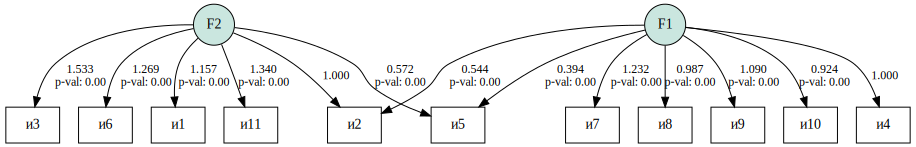

In [9]:
g = semopy.semplot(mod, "pd.png")
g

In [10]:
stats = semopy.calc_stats(mod)
print(stats.T)

                    Value
DoF             41.000000
DoF Baseline    55.000000
chi2           195.173685
chi2 p-value     0.000000
chi2 Baseline  710.691801
CFI              0.764869
GFI              0.725375
AGFI             0.631601
NFI              0.725375
TLI              0.684580
RMSEA            0.143347
AIC             47.878547
BIC            128.251941
LogLik           1.060727


Вывод: модель плохо согласуется с исходными данными.

# Пример 4. Модель Наследова КФА4 (CFA4)

In [40]:
import os
os.chdir("C:/Users/HP/Documents/analysis/Marketing/data/")

In [41]:
#Априорная модель
desc='''
F1 =~ и4 + и7 + и8 + и9 + и11
F2 =~ и11 + и1 + и3 + и6
F3 =~ и5 + и2 + и10 + и6
F1 ~~ F2
F2 ~~ F3
F1 ~~ F3
и4 ~~ и10
и4 ~~ и5
и7 ~~ и9
и9 ~~ и1
и11 ~~ и5
и4 ~~ и9
и8 ~~ и11
и11 ~~ и10
'''

In [42]:
import pandas as pd
data = pd.read_spss('IQ.sav')

In [43]:
data.shape

(184, 11)

In [8]:
#Проверка данных на пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   и1      184 non-null    float64
 1   и2      184 non-null    float64
 2   и3      184 non-null    float64
 3   и4      184 non-null    float64
 4   и5      184 non-null    float64
 5   и6      184 non-null    float64
 6   и7      184 non-null    float64
 7   и8      184 non-null    float64
 8   и9      184 non-null    float64
 9   и10     184 non-null    float64
 10  и11     184 non-null    float64
dtypes: float64(11)
memory usage: 15.9 KB


In [9]:
data.describe()

,и1,и2,и3,и4,и5,и6,и7,и8,и9,и10,и11
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,10.494565,9.788043,9.858872,11.076816,10.079965,9.782609,10.842302,9.661394,11.962623,11.093456,9.352443
std,2.162768,2.836851,2.510265,2.075034,2.006903,2.392274,3.044254,2.385941,3.009826,2.661918,2.322710
min,7.000000,0.000000,3.000000,5.157408,4.418015,2.000000,3.603006,3.675143,2.737026,3.000000,2.322896
25%,9.000000,8.000000,8.000000,10.000000,8.000000,8.000000,9.000000,8.000000,11.000000,10.000000,8.000000
50%,10.000000,10.000000,10.000000,11.000000,10.000000,11.000000,10.000000,10.000000,12.000000,11.000000,9.000000
75%,12.000000,12.000000,11.669191,12.574323,12.000000,12.000000,13.000000,11.000000,14.000000,13.000000,11.000000
max,16.000000,17.000000,15.000000,17.170950,14.861310,13.000000,18.516373,15.000000,18.000000,18.000000,16.000000


In [16]:
# Skew for each attribute
skew = data.skew()
print(skew)

и1     0.343331
и2    -0.601276
и3    -0.115813
и4    -0.107611
и5    -0.049227
и6    -0.950319
и7     0.044927
и8    -0.137701
и9    -0.863721
и10   -0.426792
и11   -0.092678
dtype: float64


Ассиметрия индивидуальных оценок признаков находится в пределах интервала от -1 до 1, поэтому можно предположить несущественное отклонение от нормальности.

In [17]:
# Kurtosios for each attribute
kurtosis = data.kurtosis()
print(kurtosis)

и1    -0.371492
и2     0.796877
и3     0.023309
и4     0.270108
и5    -0.636556
и6     0.956611
и7    -0.249314
и8    -0.081669
и9     0.662422
и10    0.988965
и11    0.348070
dtype: float64


Эксцесс индивидуальных оценок признаков находится в пределах интервала от -1 до 1, поэтому можно предположить несущественное отклонение от нормальности.

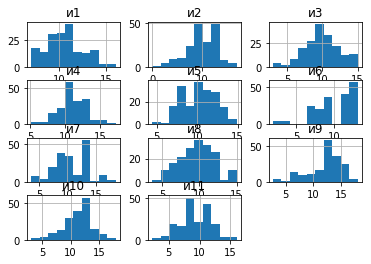

In [22]:
# Univariate Histograms
from matplotlib import pyplot
data.hist()
pyplot.show()

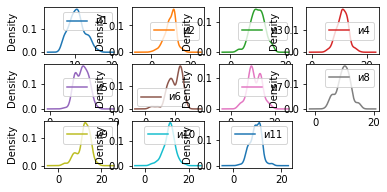

In [24]:
# Univariate Density Plots
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
pyplot.show()

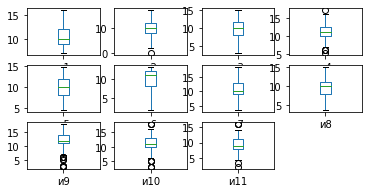

In [25]:
# Box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
pyplot.show()

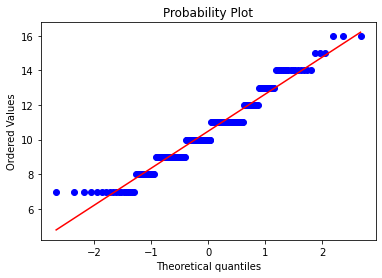

In [27]:
#Quantile-Quantile Plot
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(data['и1'], dist="norm", plot=pylab)
pylab.show()

In [21]:
# The Shapiro-Wilk normality test
#H0 (null): The variables follow a multivariate normal distribution.
#Ha (alternative): The variables do not follow a multivariate normal distribution.
from scipy import stats
stat, p = stats.shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.000
Sample does not look Gaussian (reject H0)


In [14]:
#pip install pingouin

In [30]:
#Henze-Zirkler Multivariate Normality Test
#H0 (null): The variables follow a multivariate normal distribution.
#Ha (alternative): The variables do not follow a multivariate normal distribution.
#import necessary packages
from pingouin import multivariate_normality
import pandas as pd
import numpy as np

#perform the Henze-Zirkler Multivariate Normality Test
multivariate_normality(data, alpha=.05)

HZResults(hz=2.4789464898505016, pval=0.0, normal=False)

pval=0.0<alpha=0.05, поэтому отвергаем нулевую гипотезу о многомерной нормальности распределения.

In [44]:
from semopy import Model
mod = Model(desc)

In [45]:
res=mod.fit(data)
res

SolverResult(fun=0.24562754723940117, success=True, n_it=46, x=array([ 1.20802551,  1.05888621,  1.07738975, -0.40606982,  0.7308967 ,
        0.99316506,  0.42445242,  0.57454625,  1.7540724 ,  1.4700674 ,
        1.38788185,  1.05244457,  2.84663426,  1.12425879,  3.07098114,
        1.40386893,  0.75860943, -0.87629775,  1.43255864,  1.71282832,
        5.05648678, -1.19507891,  5.72555496,  0.59173725, -0.77842777,
        2.72449689,  0.89087559,  2.46575375,  2.55015154,  4.06090339,
        3.04909205,  3.23468487,  3.06470021,  3.86800239,  1.60425329]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [49]:
#Количество оцениваемых параметров
T=res.n_it
T

46

In [51]:
#Количество наблюдений
N=len(data)
N

184

In [55]:
#Соотношение N/T
k=N/T
if k>20:
    print(k,'- оптимальное соотношение объема выборки и числа оцениваемых параметров')
elif k>10:
    print(k,'- хорошее соотношение объема выборки и числа оцениваемых параметров')
elif k>5:
    print(k,'- допустимое соотношение объема выборки и числа оцениваемых параметров')
else:
    print(k,'- недопустимое соотношение объема выборки и числа оцениваемых параметров')

4.0 - недопустимое соотношение объема выборки и числа оцениваемых параметров


In [70]:
print(mod.inspect())

   lval  op rval  Estimate  Std. Err   z-value   p-value
0    и4   ~   F1  1.000000         -         -         -
1    и7   ~   F1  1.208026  0.139027  8.689116       0.0
2    и8   ~   F1  1.058886  0.112874  9.381123       0.0
3    и9   ~   F1  1.077390  0.159735   6.74487       0.0
4   и11   ~   F1 -0.406070  0.147132 -2.759904  0.005782
5   и11   ~   F2  1.000000         -         -         -
6    и1   ~   F2  0.730897  0.139125  5.253524       0.0
7    и3   ~   F2  0.993165   0.18359  5.409677       0.0
8    и6   ~   F2  0.424452  0.139874  3.034541  0.002409
9    и6   ~   F3  0.574546   0.18257  3.146994   0.00165
10   и5   ~   F3  1.000000         -         -         -
11   и2   ~   F3  1.754072  0.244111  7.185566       0.0
12  и10   ~   F3  1.470067   0.21281  6.907894       0.0
13   F1  ~~   F2  1.387882  0.421435  3.293225   0.00099
14   F1  ~~   F3  1.052445  0.258444  4.072237  0.000047
15   F1  ~~   F1  2.846634  0.459278  6.198066       0.0
16   F2  ~~   F3  1.124259  0.3

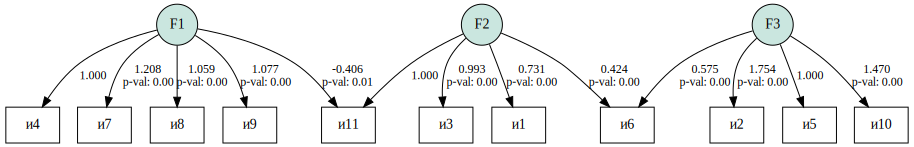

In [71]:
g = semopy.semplot(mod, "pd.png")
g

In [72]:
stats = semopy.calc_stats(mod)
print(stats.T)

                    Value
DoF             31.000000
DoF Baseline    55.000000
chi2            45.195469
chi2 p-value     0.047888
chi2 Baseline  710.691801
CFI              0.978350
GFI              0.936406
AGFI             0.887173
NFI              0.936406
TLI              0.961589
RMSEA            0.050023
AIC             69.508745
BIC            182.031496
LogLik           0.245628


Интерпретация основных критериев согласия:
* chi2 p-value > 0.05 -> хорошее согласие модели.
* RMSEA <= 0.05 -> хорошее согласие модели.
* CFI, NFI > 0.95 (0.90) -> хорошее согласие модели.
* GFI, AGFI > 0.90 -> хорошее согласие модели.

У нас модель не плохая.

In [74]:
#Semopy provides a report function that takes a fitted model and generates an HTML file
from semopy import ModelMeans

model = ModelMeans(desc)
model.fit(data)
semopy.report(model, "CFA4")

# Пример 5. Модель Наследова СМ1 (SM1)

In [121]:
desc='''
F1 =~ тест5 + тест4 + тест3
отметка2 ~ отметка1
отметка2 ~ тест5
отметка1 ~ F1
F1 ~ пол
'''

In [122]:
from semopy import Model
mod = Model(desc)

In [123]:
import pandas as pd
data = pd.read_spss('ex01.sav')

In [124]:
data

,№,пол,класс,вуз,хобби,тест1,тест2,тест3,тест4,тест5,отметка1,отметка2
0,1.0,МУЖ,Б,ЕСТ_Н,искусство,6.0,7.0,13.0,10.0,14.0,3.90,4.20
1,2.0,МУЖ,А,ЕСТ_Н,спорт,8.0,9.0,10.0,11.0,11.0,3.55,3.95
2,3.0,МУЖ,В,ТЕХН,компьютер,10.0,6.0,10.0,8.0,9.0,3.75,4.65
3,4.0,ЖЕН,В,ГУМ,компьютер,13.0,9.0,10.0,12.0,6.0,3.85,3.95
4,5.0,МУЖ,Б,ТЕХН,искусство,12.0,8.0,12.0,18.0,12.0,4.20,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,ЖЕН,А,ЭКОН,компьютер,12.0,12.0,12.0,11.0,9.0,4.10,4.10
96,97.0,ЖЕН,Б,ЕСТ_Н,спорт,9.0,13.0,13.0,10.0,11.0,3.45,4.35
97,98.0,ЖЕН,А,ЭКОН,искусство,5.0,7.0,15.0,15.0,12.0,3.70,4.30
98,99.0,МУЖ,А,ЕСТ_Н,спорт,10.0,14.0,9.0,10.0,12.0,3.75,4.45


In [125]:
sex={'ЖЕН':1, 'МУЖ':2}
sex

{'ЖЕН': 1, 'МУЖ': 2}

In [126]:
clas={'А':1,'Б':2,'В':3}
clas

{'А': 1, 'Б': 2, 'В': 3}

In [127]:
university={'ГУМ':1,'ЭКОН':2,'ТЕХН':3,'ЕСТ_Н':4}
university

{'ГУМ': 1, 'ЭКОН': 2, 'ТЕХН': 3, 'ЕСТ_Н': 4}

In [128]:
hobby={'спорт':1,'компьютер':2,'искусство':3}
hobby

{'спорт': 1, 'компьютер': 2, 'искусство': 3}

In [129]:
data['пол']=data['пол'].map(sex)
data['класс']=data['класс'].map(clas)
data['вуз']=data['вуз'].map(university)
data['хобби']=data['хобби'].map(hobby)
data

,№,пол,класс,вуз,хобби,тест1,тест2,тест3,тест4,тест5,отметка1,отметка2
0,1.0,2,2,4,3,6.0,7.0,13.0,10.0,14.0,3.90,4.20
1,2.0,2,1,4,1,8.0,9.0,10.0,11.0,11.0,3.55,3.95
2,3.0,2,3,3,2,10.0,6.0,10.0,8.0,9.0,3.75,4.65
3,4.0,1,3,1,2,13.0,9.0,10.0,12.0,6.0,3.85,3.95
4,5.0,2,2,3,3,12.0,8.0,12.0,18.0,12.0,4.20,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,1,1,2,2,12.0,12.0,12.0,11.0,9.0,4.10,4.10
96,97.0,1,2,4,1,9.0,13.0,13.0,10.0,11.0,3.45,4.35
97,98.0,1,1,2,3,5.0,7.0,15.0,15.0,12.0,3.70,4.30
98,99.0,2,1,4,1,10.0,14.0,9.0,10.0,12.0,3.75,4.45


In [130]:
res=mod.fit(data)
res

SolverResult(fun=0.09345269048756721, success=True, n_it=36, x=array([ 1.0330547 ,  0.9467359 ,  0.34946221,  0.01966632,  0.05271879,
       -2.11446596,  4.85817214,  2.95683307,  4.39769469,  0.08152528,
        0.05808454,  4.4782603 ]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [131]:
print(mod.inspect(std_est=True))

        lval  op      rval  Estimate  Est. Std  Std. Err   z-value   p-value
0      тест5   ~        F1  1.000000  0.691082         -         -         -
1   отметка1   ~        F1  0.052719  0.347189  0.018089  2.914376  0.003564
2         F1   ~       пол -2.114466 -0.514351  0.492999 -4.288989  0.000018
3      тест4   ~        F1  1.033055  0.684824  0.204961  5.040248       0.0
4      тест3   ~        F1  0.946736  0.667747  0.189998  4.982864  0.000001
5   отметка2   ~  отметка1  0.349462  0.387035  0.081539  4.285809  0.000018
6   отметка2   ~     тест5  0.019666  0.207560  0.008557  2.298404  0.021539
7         F1  ~~        F1  2.956833  0.735444  0.930621   3.17727  0.001487
8      тест5  ~~     тест5  4.397695  0.522405  0.902874  4.870776  0.000001
9   отметка1  ~~  отметка1  0.081525  0.879460  0.012068  6.755723       0.0
10     тест4  ~~     тест4  4.858172  0.531016  0.982313  4.945644  0.000001
11  отметка2  ~~  отметка2  0.058085  0.768573  0.008214  7.071068       0.0

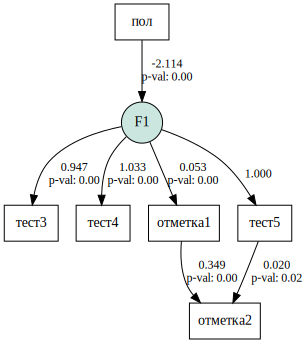

In [104]:
g = semopy.semplot(mod, "pd.png")
g

In [147]:
print(g)

digraph G {
	overlap=scale splines=true
	edge [fontsize=12]
	node [fillcolor="#cae6df" shape=circle style=filled]
	F1 [label=F1]
	node [shape=box style=""]
	"отметка2" [label="отметка2"]
	"тест3" [label="тест3"]
	"тест4" [label="тест4"]
	"отметка1" [label="отметка1"]
	"пол" [label="пол"]
	"тест5" [label="тест5"]
	F1 -> "тест5" [label=1.000]
	F1 -> "отметка1" [label="0.053\np-val: 0.00"]
	"пол" -> F1 [label="-2.114\np-val: 0.00"]
	F1 -> "тест4" [label="1.033\np-val: 0.00"]
	F1 -> "тест3" [label="0.947\np-val: 0.00"]
	"отметка1" -> "отметка2" [label="0.349\np-val: 0.00"]
	"тест5" -> "отметка2" [label="0.020\np-val: 0.02"]
}


In [105]:
stats = semopy.calc_stats(mod)
print(stats.T)

                    Value
DoF              9.000000
DoF Baseline    16.000000
chi2             9.345269
chi2 p-value     0.406032
chi2 Baseline  125.143123
CFI              0.996837
GFI              0.925323
AGFI             0.867242
NFI              0.925323
TLI              0.994376
RMSEA            0.019685
AIC             23.813095
BIC             55.075137
LogLik           0.093453


In [132]:
from semopy.means import estimate_means
print(estimate_means(mod))

       lval op rval   Estimate
0  отметка1  ~    1   4.117946
1       пол  ~    1   1.390000
2     тест5  ~    1  14.779108
3  отметка2  ~    1   2.602732
4     тест3  ~    1  14.742559
5     тест4  ~    1  14.546259


In [133]:
print(data.mean())

№           50.5000
тест1       10.2500
тест2       10.3500
тест3       11.9600
тест4       11.5100
тест5       11.8400
отметка1     3.9630
отметка2     4.2205
dtype: float64


In [134]:
from semopy import ModelMeans
model = ModelMeans(desc)
model.fit(data)
print(model.inspect())

        lval  op      rval   Estimate  Std. Err    z-value   p-value
0      тест5   ~        F1   1.000000         -          -         -
1   отметка1   ~        F1   0.052719  0.018092   2.913984  0.003568
2         F1   ~       пол  -2.114542  0.492907  -4.289939  0.000018
3      тест4   ~        F1   1.032672  0.204957    5.03849       0.0
4      тест3   ~        F1   0.947185  0.190059   4.983627  0.000001
5   отметка2   ~  отметка1   0.349427  0.081544    4.28514  0.000018
6   отметка2   ~     тест5   0.019659  0.008558   2.297175  0.021609
7   отметка1   ~         1   4.117953  0.064585  63.760184       0.0
8      тест5   ~         1  14.779218  0.736835  20.057717       0.0
9   отметка2   ~         1   2.602956  0.315543   8.249125       0.0
10     тест3   ~         1  14.743962  0.712918  20.681133       0.0
11     тест4   ~         1  14.545253  0.765632  18.997717       0.0
12        F1  ~~        F1   2.955007  0.930123   3.177006  0.001488
13     тест5  ~~     тест5   4.395

In [106]:
#Semopy provides a report function that takes a fitted model and generates an HTML file
from semopy import ModelMeans

model = ModelMeans(desc)
model.fit(data)
semopy.report(model, "SM1")

C:\Users\HP\Anaconda3\lib\site-packages\semopy\stats.py:386: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((chi2 / dof - 1) / (model.n_samples - 1))


In [108]:
#Prediction of factor scores
factors = mod.predict_factors(data)
factors.head()

,F1
0,-0.151414
1,-0.782005
2,-1.736209
3,-0.463937
4,2.076909


In [109]:
len(data)

100

In [111]:
# Prediction of output dependent variables by exogenous
data_test = data.iloc[:20]
data_train = data.iloc[20:]
model.fit(data_train)
preds = model.predict_exo(data_test.drop(['отметка2'], axis=1))
print('Mean relative error: {:.3f}%'.format(
      abs((preds['отметка2'].values - data_test['отметка2'].values) / data_test['отметка2'].values).mean() * 100))

Mean relative error: 6.052%


In [112]:
# Prediction of output dependent variables by exogenous
data_test = data.iloc[:20]
data_train = data.iloc[20:]
model.fit(data_train)
preds = model.predict_exo(data_test.drop(['отметка1'], axis=1))
print('Mean relative error: {:.3f}%'.format(
      abs((preds['отметка1'].values - data_test['отметка1'].values) / data_test['отметка1'].values).mean() * 100))

Mean relative error: 5.932%


# Таким образом, не нашла, как рассчитываются в питоне:
* Многомерный эксцесс (multivariate kurtosis) для проверки многомерной нормальности.
* Индексы модификации (modification indices) для изменения априорной модели.

In [15]:
#https://www.researchgate.net/search/publication?q=Multivariate+kurtosis+in+python